In [33]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [34]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0, shear_range=0.2,
 zoom_range=0.2, rotation_range=45,
horizontal_flip=True, vertical_flip=True,
validation_split=0.2)

In [35]:
from google.colab import drive
import tensorflow as tf

# Mount Google Drive
drive.mount('/content/drive')
train = datagen.flow_from_directory('/content/drive/MyDrive/GarbageClassification/Garbage classification/', target_size=(256, 256),
 batch_size=16, class_mode='categorical', interpolation='lanczos',
 shuffle=True, subset="training")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2024 images belonging to 6 classes.


In [36]:
test = datagen.flow_from_directory('/content/drive/MyDrive/GarbageClassification/Garbage classification/', target_size=(256, 256),
 batch_size=16, class_mode='categorical', interpolation='lanczos',
 shuffle=True, subset="validation")

Found 503 images belonging to 6 classes.


In [37]:
train.classes

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

In [38]:
len(train.classes)

2024

In [39]:

train.image_shape

(256, 256, 3)

In [40]:
type(train)

keras.src.legacy.preprocessing.image.DirectoryIterator

In [41]:
t1=train[0]

In [42]:
type(t1)

tuple

In [43]:
len(t1)

2

In [44]:
len(t1[0])

16

In [45]:
type(t1[0])

numpy.ndarray

In [46]:
t1[0].shape

(16, 256, 256, 3)

In [47]:
len(t1[1])

16

In [48]:
type(t1[1])

numpy.ndarray

In [49]:
t1[1].shape

(16, 6)

In [50]:
t1[0][0]

array([[[0.86719894, 0.8475911 , 0.73386556],
        [0.86274517, 0.8431373 , 0.7294118 ],
        [0.86371666, 0.8441088 , 0.73038334],
        ...,
        [0.46645287, 0.4625313 , 0.38409993],
        [0.46490368, 0.4609821 , 0.38255072],
        [0.4633545 , 0.45943293, 0.38100153]],

       [[0.8704456 , 0.85083777, 0.7371123 ],
        [0.86381143, 0.8442036 , 0.73047805],
        [0.86274517, 0.8431373 , 0.7294118 ],
        ...,
        [0.4630073 , 0.45908573, 0.38065436],
        [0.46145812, 0.45753655, 0.37910518],
        [0.45990893, 0.45598736, 0.377556  ]],

       [[0.87369233, 0.8540845 , 0.73880696],
        [0.8670581 , 0.84745026, 0.7337248 ],
        [0.86274517, 0.8431373 , 0.7294118 ],
        ...,
        [0.45956177, 0.4556402 , 0.3772088 ],
        [0.45882356, 0.454902  , 0.37647063],
        [0.45882356, 0.454902  , 0.37647063]],

       ...,

       [[0.8980393 , 0.8980393 , 0.85098046],
        [0.8980393 , 0.8980393 , 0.85098046],
        [0.8980393 , 0

In [51]:
t1[1][0]

array([0., 0., 0., 1., 0., 0.], dtype=float32)

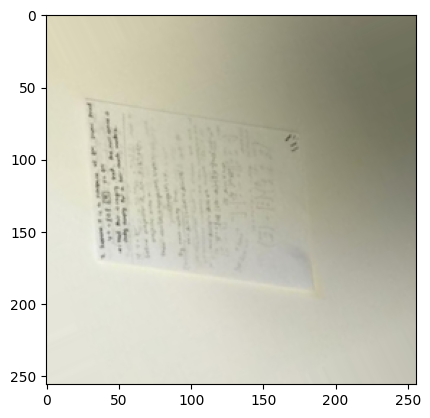

In [52]:
plt.imshow(t1[0][0])

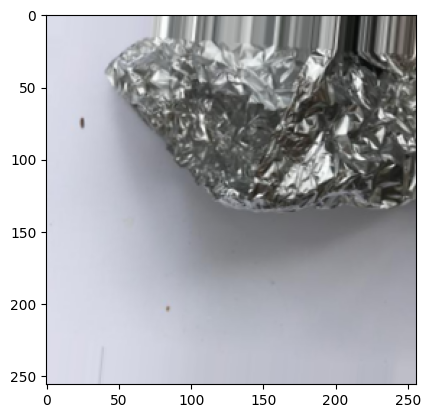

In [53]:
plt.imshow(t1[0][2])

In [54]:
t1[1][2]

array([0., 0., 1., 0., 0., 0.], dtype=float32)

In [55]:
for images,lables in train:
  print(len(images),len(lables))
  break

16 16


In [56]:
img_shape=(256,256,3)

In [57]:
imagenet=tf.keras.applications.MobileNet(include_top=False,weights="imagenet",input_shape=img_shape)

<ipython-input-57-54d4c1c62fec>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  imagenet=tf.keras.applications.MobileNet(include_top=False,weights="imagenet",input_shape=img_shape)


In [58]:
model=tf.keras.models.Sequential()

In [59]:
model.add(tf.keras.layers.Input(img_shape))
model.add(imagenet)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(6,activation='softmax'))

In [60]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 8, 8, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │      67,109,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │           6,150 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,344,902 (268.34 MB)

 Trainable params: 70,323,014 (268.26 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [62]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [63]:
myEarlyStopping=EarlyStopping(monitor='val_loss',verbose=1,patience=3)

In [64]:
myCheckpoint=ModelCheckpoint('grabageclassification-model-{epoch:03d}.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=grabageclassification-model-{epoch:03d}.h5

In [ ]:
history=model.fit(train,epochs=8,validation_data=test,callbacks=[myEarlyStopping,myCheckpoint])

In [ ]:
model.save('/content/drive/MyDrive/garbageclassification-final.keras')


In [ ]:
train_acc=history.history['accuracy']

In [ ]:
train_loss=history.history['loss']

In [ ]:
epochsUnderwent=range(1,len(train_acc)+1)
print(epochsUnderwent)

In [ ]:
plt.plot(epochsUnderwent,train_acc,'b*-',label='Training accuracy')
plt.title('Training accuracy')
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.plot(epochsUnderwent,train_loss,'b*-',label='Trainang loss',color='red')
plt.title('Training Loss')
plt.legend()

In [ ]:
model.evaluate(test)

In [ ]:
predictions=model.predict(test)

In [ ]:
type(predictions)

In [ ]:
predictions[0:5]

In [ ]:
finalpredictions=np.argmax(predictions,axis=1)

In [ ]:
finalpredictions[0:5]

In [ ]:
class_indices=train.class_indices
labels={v:k for k,v in class_indices.items()}
class_labels=[labels[i]for i in range(len(labels))]

In [ ]:
labels

In [ ]:
class_labels

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
test.classes

In [ ]:
report=classification_report(test.classes,finalpredictions,target_names=class_labels)

In [ ]:
print(report)

In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def myPredict(image_path):
    # Load the image and preprocess it
    img = load_img(image_path, target_size=(256, 256), interpolation='lanczos')
    img_array = img_to_array(img)
    scaled_img_array = img_array / 255.0

    # Use the model to predict the class probabilities
    probs = model.predict(np.array([scaled_img_array]))

    # Map the probabilities to the class labels
    class_indices = train.class_indices
    labels = {v: k for k, v in class_indices.items()}
    predicted_class_index = np.argmax(probs)
    predicted_class = labels[predicted_class_index]

    # Get the confidence of the prediction
    confidence = probs[0][predicted_class_index]

    # Display the image and prediction
    plt.imshow(scaled_img_array)
    plt.title(f'Predicted class: {predicted_class} | Confidence: {confidence * 100:.2f}%')
    plt.show()



In [ ]:
test1='/content/drive/MyDrive/glassbot.jpg'
test2='/content/drive/MyDrive/plastic.jpg'

In [ ]:
train.class_indices

In [ ]:
myPredict(test1)

In [ ]:
myPredict(test2)